In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt


In [2]:
# Downloading necessary NLTK data for preprocessing
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load the dataset 
df = pd.read_csv('mail_data.csv')
print(df.head())



  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
# Function to clean and preprocess the text data
def preprocess_text(text):
    # Converting text to lowercase
    text = text.lower()
    # Removing digits and special characters
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W+', ' ', text)
    # Removing extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenizing and remove stopwords
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
   
    return ' '.join(tokens)


In [6]:
# Applying the preprocessing to column 'Message' 
df['Message'] = df['Message'].apply(preprocess_text)

# Map the column 'Category'  to numerical values
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)


In [13]:
# Use TF-IDF to vectorize the text data
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)


lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)

# Make predictions on the test set
y_pred = lr.predict(x_test_tfidf)
y_pred_proba = lr.predict_proba(x_test_tfidf)[:, 1]

In [15]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'ROC-AUC: {roc_auc}')



Accuracy: 0.967713004484305
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.77      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

ROC-AUC: 0.9904122722914669


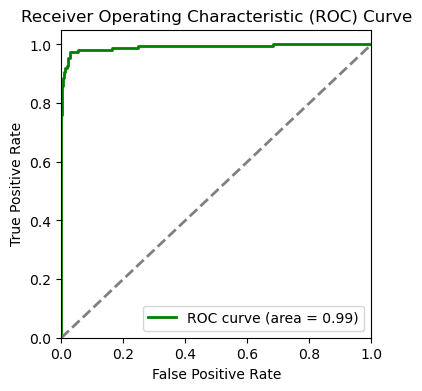

In [20]:
# Ploting the ROC curve to visualize the model's performance
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



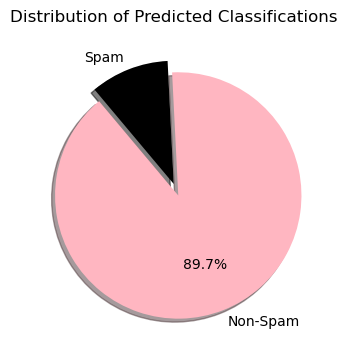

In [18]:
# Count the occurrences of each class in the predictions
pred_counts = pd.Series(y_pred).value_counts()

# Plot a pie chart to show the distribution of predictions
labels = ['Non-Spam', 'Spam']
colors = ['lightpink', 'black']
explode = (0.1, 0)

plt.figure(figsize=(4, 4))
plt.pie(pred_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=130)
plt.title('Distribution of Predicted Classifications')
plt.show()